# Question 2
## analyze_visits.py

In [1]:
# step 1
import pandas as pd
import numpy as np

df = pd.read_csv('ms_data.csv')
df['visit_date'] = pd.to_datetime(df['visit_date'])
df.sort_values(by=['patient_id','visit_date'])
print(df)

      patient_id visit_date    age education_level  walking_speed
0          P0001 2020-01-07  53.07        Graduate           4.03
1          P0001 2020-04-19  53.36        Graduate           4.97
2          P0001 2020-07-09  53.58        Graduate           4.15
3          P0001 2020-09-26  53.79        Graduate           4.34
4          P0001 2020-12-22  54.03        Graduate           4.47
...          ...        ...    ...             ...            ...
15382      P1000 2022-05-23  75.30    Some College           2.53
15383      P1000 2022-08-29  75.57    Some College           3.60
15384      P1000 2023-03-02  76.08    Some College           3.03
15385      P1000 2023-06-12  76.36    Some College           2.66
15386      P1000 2023-09-23  76.64    Some College           2.92

[15387 rows x 5 columns]


In [2]:
# step 2
# dictionary for each patient_id value to get a random insurance type
insurance = pd.read_table('insurance.lst')
insurance = pd.Series(insurance['insurance_type'])
id_list = np.unique(df['patient_id'])
insurance_type = {}
for i in range(len(id_list)):
    insurance_type[id_list[i]] = insurance[np.random.randint(3)]

# insert values into insurance column based on dictionary
for i in range(len(df)):
    df.loc[i, 'insurance'] = insurance_type[df.loc[i, 'patient_id']]
    # generate a random cost for each visit based on insurance type
    # average of basic coverage is 1000, premium is 750, platinum is 500
    # actual cost can range from 80-120% of average, and each visit is generated independently
    if df.loc[i, 'insurance']=='Basic': df.loc[i, 'visit_cost'] = round(1000*np.random.uniform(low=0.8, high=1.2), 2)
    if df.loc[i, 'insurance']=='Premium': df.loc[i, 'visit_cost'] = round(750*np.random.uniform(low=0.8, high=1.2), 2)
    if df.loc[i, 'insurance']=='Platinum': df.loc[i, 'visit_cost'] = round(500*np.random.uniform(low=0.8, high=1.2), 2)
print(df)

      patient_id visit_date    age education_level  walking_speed insurance  \
0          P0001 2020-01-07  53.07        Graduate           4.03   Premium   
1          P0001 2020-04-19  53.36        Graduate           4.97   Premium   
2          P0001 2020-07-09  53.58        Graduate           4.15   Premium   
3          P0001 2020-09-26  53.79        Graduate           4.34   Premium   
4          P0001 2020-12-22  54.03        Graduate           4.47   Premium   
...          ...        ...    ...             ...            ...       ...   
15382      P1000 2022-05-23  75.30    Some College           2.53   Premium   
15383      P1000 2022-08-29  75.57    Some College           3.60   Premium   
15384      P1000 2023-03-02  76.08    Some College           3.03   Premium   
15385      P1000 2023-06-12  76.36    Some College           2.66   Premium   
15386      P1000 2023-09-23  76.64    Some College           2.92   Premium   

       visit_cost  
0          712.85  
1          

In [3]:
# step 3
import statsmodels.formula.api as smf
import statsmodels.api as sm

print('Mean Walking Speed by Education Level\n', df.groupby('education_level')['walking_speed'].mean(), '\n')
print('Mean Visit Cost by Insurance Type\n', df.groupby('insurance')['visit_cost'].mean(), '\n')

print("=== Linear Regression for Walking Speed by Age ===")
model = smf.ols(formula='walking_speed~age', data=df)
results = model.fit()
print(results.summary().tables[1])

Mean Walking Speed by Education Level
 education_level
Bachelors       4.018453
Graduate        4.476606
High School     3.236911
Some College    3.606970
Name: walking_speed, dtype: float64 

Mean Visit Cost by Insurance Type
 insurance
Basic       996.758677
Platinum    499.877258
Premium     751.228788
Name: visit_cost, dtype: float64 

=== Linear Regression for Walking Speed by Age ===
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4525      0.014    381.430      0.000       5.424       5.480
age           -0.0309      0.000   -118.965      0.000      -0.031      -0.030


# Question 3
## stats_analysis.py

In [4]:
import statsmodels.formula.api as smf
# part 1 - analyze walking speed
df.loc[df['education_level']=='High School', 'education_num'] = 0
df.loc[df['education_level']=='Some College', 'education_num'] = 1
df.loc[df['education_level']=='Bachelors', 'education_num'] = 2
df.loc[df['education_level']=='Graduate', 'education_num'] = 3
print("=== Linear Regression for Walking Speed by Age and Education ===")
model = smf.ols(formula='walking_speed~age+education_level', data=df)
results = model.fit()
print(results.summary().tables[1])

=== Linear Regression for Walking Speed by Age and Education ===
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           5.6203      0.010    556.176      0.000       5.601       5.640
education_level[T.Graduate]         0.3966      0.008     50.352      0.000       0.381       0.412
education_level[T.High School]     -0.8075      0.008   -100.615      0.000      -0.823      -0.792
education_level[T.Some College]    -0.4113      0.008    -52.670      0.000      -0.427      -0.396
age                                -0.0303      0.000   -191.897      0.000      -0.031      -0.030


Overall visit cost statistics:
 count    15387.000000
mean       752.664421
std        220.886438
min        400.000000
25%        553.335000
50%        757.100000
75%        902.005000
max       1199.830000
Name: visit_cost, dtype: float64 

Basic insurance visit cost statistics:
 count    5186.000000
mean      996.758677
std       114.303099
min       800.050000
25%       898.775000
50%       996.480000
75%      1093.570000
max      1199.830000
Name: visit_cost, dtype: float64 

Premium insurance visit cost statistics:
 count    5223.000000
mean      751.228788
std        87.095497
min       600.090000
25%       676.565000
50%       750.530000
75%       827.365000
max       899.900000
Name: visit_cost, dtype: float64 

Platinum insurance visit cost statistics:
 count    4978.000000
mean      499.877258
std        57.116384
min       400.000000
25%       450.390000
50%       500.820000
75%       548.310000
max       599.940000
Name: visit_cost, dtype: float64 



Text(0.5, 1.0, 'BMI Distribution by Age Group')

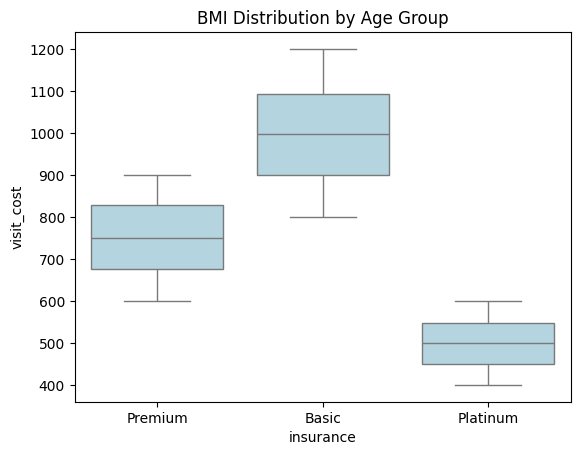

In [5]:
import seaborn as sns
# part 2 - analyze costs

print('Overall visit cost statistics:\n', df['visit_cost'].describe(), '\n')
print('Basic insurance visit cost statistics:\n', df.loc[df['insurance']=='Basic', 'visit_cost'].describe(), '\n')
print('Premium insurance visit cost statistics:\n', df.loc[df['insurance']=='Premium', 'visit_cost'].describe(), '\n')
print('Platinum insurance visit cost statistics:\n', df.loc[df['insurance']=='Platinum', 'visit_cost'].describe(), '\n')

ax = sns.boxplot(data=df, x='insurance', y='visit_cost', color='lightblue')
ax.set_title('BMI Distribution by Age Group')

=== Examination of Confounding of Education Level on Walking Speed by Age ===
Unadjusted R2 value:  0.4791414000613453
Adjusted by education_level R2 value:  0.8082336471676728
Difference in R2:  0.32909224710632745 

=== Interaction of Education Level on Walking Speed by Age ===
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               5.6026      0.018    311.027      0.000       5.567       5.638
education_level[T.Graduate]             0.4476      0.025     18.114      0.000       0.399       0.496
education_level[T.High School]         -0.7838      0.025    -31.086      0.000      -0.833      -0.734
education_level[T.Some College]        -0.4155      0.025    -16.794      0.000      -0.464      -0.367
age                                    -0.0299      0.000    -92.696      0.000      -0.031    

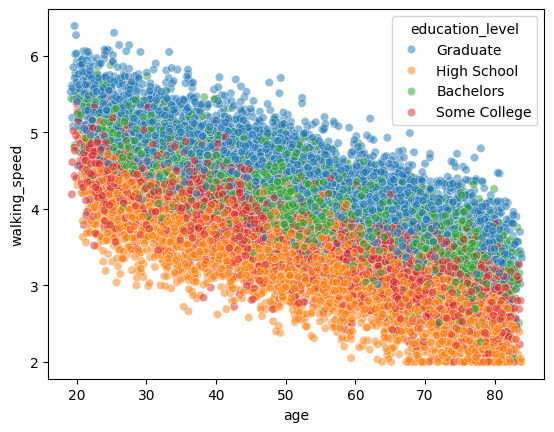

In [6]:
# part 3 - advanced analysis
sns.scatterplot(data=df, 
                x='age', 
                y='walking_speed', 
                hue='education_level',
                alpha=0.5,
                markers='.')

print("=== Examination of Confounding of Education Level on Walking Speed by Age ===")
model2 = smf.ols(formula='walking_speed~age', data=df)
results = model2.fit()
print('Unadjusted R2 value: ', results.rsquared)
model2 = smf.ols(formula='walking_speed~age+education_level', data=df)
results2 = model2.fit()
print('Adjusted by education_level R2 value: ', results2.rsquared)
print('Difference in R2: ', results2.rsquared-results.rsquared, '\n')

print("=== Interaction of Education Level on Walking Speed by Age ===")
model2 = smf.ols(formula='walking_speed~age*education_level', data=df)
results = model2.fit()
print(results.summary().tables[1])